# Sentiment Analysis
- Use summarized S-1 raw filings
- Add Sentimnet Analysis features
 - Tokenize sentences
 - Use positive and negative sentences

In [2]:
#core
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

import glob
import nasdaq
import ml
from pathlib import Path

#NLP
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load Previous Dataset

In [2]:
#load and sort by date priced
df = pd.read_csv('../Datasets/2 sentiment analysis.csv', index_col='Symbol')

# Integrating IPO Summaries

In [3]:
def get_sentiment_df(text):
    '''returns Sentiment Analysis'''
    sid = SentimentIntensityAnalyzer()
    ps_list = []
    sentences = sent_tokenize(text)
    
    for sentence in sentences:
        ps = sid.polarity_scores(sentence)
        ps['sent'] = sentence
        ps_list.append(ps)
    
    df = pd.DataFrame(ps_list)

    return df

In [4]:
def add_sentiment_features(df_sentiment, symbol):
    '''Adds Sentiment Snalysis features, returns DataFrame'''
    
    #filter frames
    df_tmp = pd.DataFrame()

    #sentences features
    df_tmp.at[symbol, 'Summary Mean Sent Len'] = df_sentiment['sent'].str.len().mean()
    df_tmp.at[symbol, 'Summary Sent Count'] = df_sentiment.shape[0]

    #sentiment
    df_sentiment = df_sentiment[['compound', 'neg', 'neu', 'pos']]
    df_tmp = pd.concat([pd.DataFrame(df_sentiment.mean(), columns=[symbol]).T.add_prefix('Summary Signal '), df_tmp], axis=1)
    
    return df_tmp

In [5]:
#add sentiment features
df_sentiment_features = pd.DataFrame()
counter = 0    

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if summary is available
        file_name = "../Summary/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()

                #get sentiment
                df_sentiment = get_sentiment_df(text)
                df_sentiment_features = pd.concat([df_sentiment_features, add_sentiment_features(df_sentiment, x)], axis=0)
        else:
            print('no S-1 summary for ', x)
    except Exception as e:
        print(x, e)
        
#combine original data with standardized sentiment features
df1 = pd.concat([ml.standardize(df_sentiment_features), df], axis=1).dropna()        


( 1 / 696 ) AACC

( 2 / 696 ) AAT

( 3 / 696 ) ABR

( 4 / 696 ) ABTX

( 5 / 696 ) ACAD

( 6 / 696 ) ACFC

( 7 / 696 ) ACIA

( 8 / 696 ) ACMR

( 9 / 696 ) ACOR

( 10 / 696 ) ACRX

( 11 / 696 ) ACUS

( 12 / 696 ) ADMS

( 13 / 696 ) ADOM

( 14 / 696 ) ADRO

( 15 / 696 ) ADSW

( 16 / 696 ) ADT

( 17 / 696 ) ADUS

( 18 / 696 ) AEL

( 19 / 696 ) AERI

( 20 / 696 ) AFFY

( 21 / 696 ) AFH

( 22 / 696 ) AIMC

( 23 / 696 ) AIMT

( 24 / 696 ) AIZ

( 25 / 696 ) AJX

( 26 / 696 ) AKAO

( 27 / 696 ) AKBA

( 28 / 696 ) AKER

( 29 / 696 ) AL

( 30 / 696 ) ALDR

( 31 / 696 ) ALDX

( 32 / 696 ) ALGT

( 33 / 696 ) ALRM

( 34 / 696 ) ALRN

( 35 / 696 ) ALSN

( 36 / 696 ) AM

( 37 / 696 ) AMBA

( 38 / 696 ) AMGP

( 39 / 696 ) ANAB

( 40 / 696 ) ANET

( 41 / 696 ) ANGI

( 42 / 696 ) ANTH

( 43 / 696 ) APAM

( 44 / 696 ) APEI

( 45 / 696 ) APKT

( 46 / 696 ) APO

( 47 / 696 ) APPF

( 48 / 696 ) APPN

( 49 / 696 ) APRN

( 50 / 696 ) ARMK

( 51 / 696 ) ARMO

( 52 / 696 ) ARYX

( 53 / 696 ) ASV

( 54 / 696 ) A


( 423 / 696 ) NOW

( 424 / 696 ) NSM

( 425 / 696 ) NSTG

( 426 / 696 ) NTGR

( 427 / 696 ) NWHM

( 428 / 696 ) NWY

( 429 / 696 ) NXTM

( 430 / 696 ) NYLD

( 431 / 696 ) OAK

( 432 / 696 ) OAS

( 433 / 696 ) OBLN

( 434 / 696 ) OC

( 435 / 696 ) OCUL

( 436 / 696 ) OFSI

( 437 / 696 ) OIS

( 438 / 696 ) OKTA

( 439 / 696 ) OLLI

( 440 / 696 ) OMED

( 441 / 696 ) OMER

( 442 / 696 ) OMPI

( 443 / 696 ) ONCE

( 444 / 696 ) ONDK

( 445 / 696 ) ONTX

( 446 / 696 ) OPESU

( 447 / 696 ) OPGN

( 448 / 696 ) OPHT

( 449 / 696 ) OPTN

( 450 / 696 ) OPTR

( 451 / 696 ) OPTT

( 452 / 696 ) ORC

( 453 / 696 ) ORIT

( 454 / 696 ) OSTK

( 455 / 696 ) OTIC

( 456 / 696 ) OTT

( 457 / 696 ) OUNZ

( 458 / 696 ) OVID

( 459 / 696 ) OXFD

( 460 / 696 ) OZM

( 461 / 696 ) P

( 462 / 696 ) PACB

( 463 / 696 ) PAGP

( 464 / 696 ) PAHC

( 465 / 696 ) PANW

( 466 / 696 ) PAY

( 467 / 696 ) PAYC

( 468 / 696 ) PBF

( 469 / 696 ) PBFX

( 470 / 696 ) PBIB

( 471 / 696 ) PBIP

( 472 / 696 ) PBPB

( 473 / 696 ) 

In [6]:
df1 = pd.concat([ml.standardize(df_sentiment_features), df], axis=1).dropna()        

In [14]:
df1 = pd.read_csv('../Datasets/3 summarization.csv', index_col='Symbol')

In [15]:
df1.head()

,Summary Signal compound,Summary Signal neg,Summary Signal neu,Summary Signal pos,Summary Mean Sent Len,Summary Sent Count,Neg Sent Signal compound,Neg Sent Signal neg,Neg Sent Signal neu,Neg Sent Signal pos,...,MKT12,Name Words,Name Length,Offer Amount,Price,Shares,1D,1W,1M,3M
Symbol,,,,,,,,,,,,,,,,,,,,,
AACC,-0.906097,5.414160,-2.693572,-1.104553,-0.597584,0.654193,0.750307,0.188291,-0.188526,-0.088264,...,0,0.950208,0.958673,-0.207315,-0.098813,-0.256559,0.002401,0.026411,0.073229,0.121248
AAT,0.731373,0.851544,-0.933858,0.433139,-0.091404,-0.477033,0.393542,-0.595995,0.415479,0.748544,...,0,0.950208,0.701675,0.305495,0.565817,0.370542,-0.017185,-0.010683,-0.019508,-0.008825
ABR,-0.093705,-1.241266,0.210279,0.739901,-0.433039,0.654193,2.255889,-0.648139,0.047402,1.835012,...,0,0.950208,0.059182,-0.184455,0.505396,-0.278814,0.022444,-0.030923,-0.022444,-0.003990
ABTX,1.347298,0.716212,-1.021951,0.655768,0.860479,-0.759840,0.371174,-0.206152,-0.139155,0.980488,...,0,-0.116672,0.701675,-0.263654,0.626238,-0.391157,0.027938,-0.008869,0.054989,0.004878
ACAD,1.327692,0.084663,-0.110939,0.065543,0.780699,-0.759840,-0.056967,0.067109,-0.039826,-0.099553,...,0,-0.116672,0.573177,-0.285564,-1.065549,-0.317740,-0.075269,-0.112903,-0.134409,-0.233871


In [10]:
#save for later improvements
df1.to_csv('../Datasets/3 summarization.csv', index=True, index_label='Symbol')

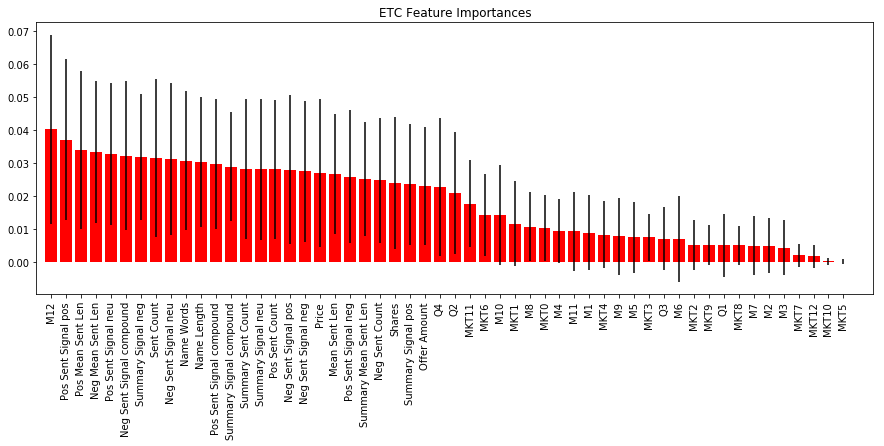

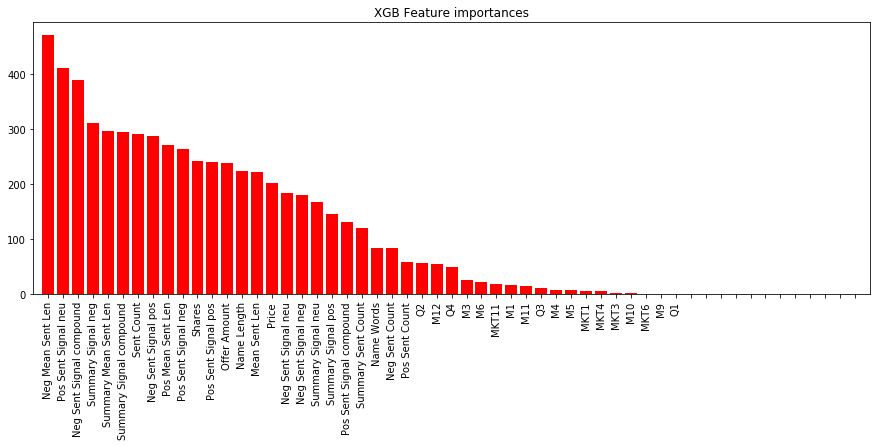

In [11]:
#feature importance
indices = ml.show_feature_importance(df1, '3M')

In [12]:
#feature selection
df1 = ml.select_features(indices.shape[0], indices, df1)

['Summary Signal compound', 'Summary Signal neg', 'Summary Mean Sent Len', 'Neg Sent Signal compound', 'Neg Sent Signal neu', 'Neg Sent Signal pos', 'Pos Sent Signal neg', 'Pos Sent Signal neu', 'Pos Sent Signal pos', 'Sent Count', 'Pos Mean Sent Len', 'Neg Mean Sent Len', 'M12', 'Name Words']


C:\Users\Void\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


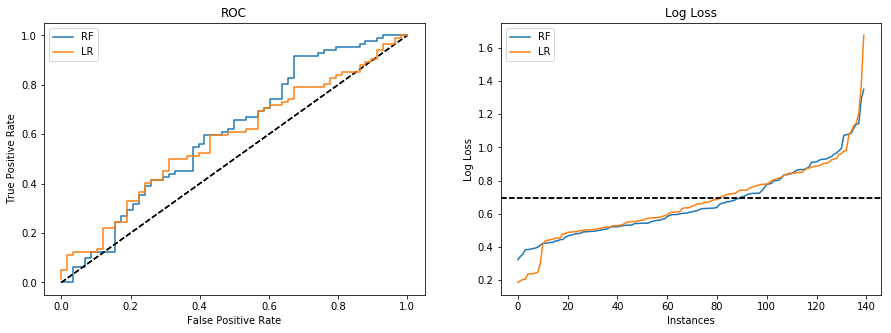

1D        1W        1M        3M
AUC      LR  0.512616  0.512616  0.512616  0.512616
         RF  0.579058  0.579058  0.579058  0.579058
f1       LR  0.726415  0.726415  0.726415  0.726415
         RF  0.757282  0.757282  0.757282  0.757282
log loss LR  0.665539  0.665539  0.665539  0.665539
         RF  0.661214  0.661214  0.661214  0.661214

In [13]:
#now run ML flow with sentiment features for summaries
ml.run_ml_flow(df1)